Disclaimer: Nothing herein is financial advice, and NOT a recommendation to trade real money. Many platforms exist for simulated trading (paper trading) which can be used for building and developing the methods discussed. Please use common sense and always first consult a professional before trading or investing.

<a target="_blank" href="https://colab.research.google.com/github/etesys/FinRL/blob/master/3-Practical/FinRL_PaperTrading_Demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Part 1: Install FinRL

In [1]:
#import pdb
## install finrl library
!pip install wrds
!pip install swig
!pip install -q condacolab
import condacolab
condacolab.install()
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
#!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git
!pip install git+https://github.com/etesys/FinRL.git  ## HSG

✨🍰✨ Everything looks OK!
  Cloning https://github.com/etesys/FinRL.git to /tmp/pip-req-build-0ekqiejw
  Running command git clone --filter=blob:none --quiet https://github.com/etesys/FinRL.git /tmp/pip-req-build-0ekqiejw
  Resolved https://github.com/etesys/FinRL.git to commit da7a267d56fd268e9248fec3c8f4d6aa63fcd579
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-l0jon4c8/elegantrl_01bc4721e2f6471b821b8e40f580ef82
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-l0jon4c8/elegantrl_01bc4721e2f6471b821b8e40f580ef82
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit 87cf325af4c0608f1e74941091a3bc277dfaf739
  Preparing metadata (setup.py) ... done


## Import related modules

In [2]:
#!pip install zipline-reloaded  ## HSG for zipline not available error
#!pip install zipline
from finrl.config_tickers import DOW_30_TICKER
from finrl.config import INDICATORS
from finrl.meta.env_stock_trading.env_stocktrading_np import StockTradingEnv # HSG
#!git clone https://github.com/etesys/FinRL/ my_finrl
#from my_finrl.finrl.meta.env_stock_trading.env_stocktrading_np import StockTradingEnv  # HSG mod to use local modifiable copy of env_stocktrading_np.py
from finrl.meta.env_stock_trading.env_stock_papertrading import AlpacaPaperTrading
from finrl.meta.data_processor import DataProcessor
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

import numpy as np
import pandas as pd


/usr/local/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
#!pip show numpy
#!pip install --upgrade numpy
#from my_finrl import tree as env_stock_trading_np
#cd my_finrl
#pip install https://colab.research.google.com/github/etesys/FinRL/blob/master/3-Practical/FinRL_PaperTrading_Demo.ipynb
#!pip install https://colab.research.google.com/github/etesys/FinRL/blob/master/finrl/meta/env_stock_trading/env_stocktrading_np.py
#import env_stocktrading_np as StockTradingEnv

#!git clone https://github.com/etesys/FinRL/tree/master/finrl/meta/env_stock_trading/ my_finrl2

#!git clone https://github.com/etesys/FinRL/ my_finrl
#!pip install my_finrl.finrl.meta.env_stock_trading.env_stocktrading_np

# this one works: from my_finrl.finrl.meta.env_stock_trading.env_stocktrading_np import StockTradingEnv

#import StockTradingEnv

#!git clone https://github.com/etesys/FinRL my_finrl
#!pip install my_env/tree/master/finrl/
#from my_env import env_stock_trading_np
#!git clone https://github.com/etesys/FinRL/tree/master/finrl/meta my_env #/tree/master/finrl/meta/env_stock_trading
#from my_env/tree/master/finrl/meta/env_stock_trading import env_stock_trading_np
#as StockTradingEnv
#from https://github.com/etesys/FinRL/tree/master/finrl/meta/env_stock_trading/ import env_stock_trading_np #.py as StockTradingEnv
#from env_stock_trading import env_stock_trading_np as StockTradingEnv


## PPO

In the context of stock trading, states, actions, and rewards are used to define the reinforcement learning problem. States are representations of the market at a given time, actions are the trades that can be made, and rewards are the profits or losses that are realized from those trades.

States are typically represented as vectors of features that describe the market. These features can include things like the prices of different stocks, the volume of trading, and the news sentiment. Actions are typically represented as integers that correspond to different trade types, such as buying, selling, or holding. Rewards are typically represented as real numbers that indicate the profit or loss from a trade.

The goal of reinforcement learning in stock trading is to learn a policy that maps states to actions in order to maximize the expected reward. This policy can then be used to trade stocks on behalf of a trader.

The calculation of states, actions, and rewards is a complex process that involves a number of different factors. However, the basic principles are as follows:

States are typically calculated by taking a snapshot of the market at a given time. This snapshot can include information such as the prices of different stocks, the volume of trading, and the news sentiment.
Actions are typically represented as integers that correspond to different trade types, such as buying, selling, or holding.
Rewards are typically calculated by taking the profit or loss from a trade. This profit or loss can be calculated by subtracting the purchase price of a stock from the sale price.
The reinforcement learning problem in stock trading is a challenging one, but it is also a very exciting one. By learning to trade stocks using reinforcement learning, traders can potentially achieve significant returns.


In the context of stock trading, an actor-critic model is a type of reinforcement learning agent that uses two neural networks to learn how to trade stocks. The actor network takes the current state of the market as input and outputs a trade action, such as buying or selling a stock. The critic network takes the current state of the market and the trade action as input and outputs a value function, which is an estimate of the expected return from taking that action.

The actor network is trained to maximize the value function output by the critic network. This is done by playing a game of self-play, in which the actor network trades stocks and the critic network evaluates the performance of those trades. Over time, the actor network learns to take actions that maximize the value function, and the critic network learns to provide accurate estimates of the value function.

Actor-critic models have been shown to be very effective for stock trading. They can learn to trade stocks in a way that outperforms human traders. This is because actor-critic models can learn to take into account a wide range of factors when making trading decisions, including the current state of the market, the historical performance of stocks, and the news sentiment.

Here is a more detailed explanation of the actor-critic model in the context of stock trading:

Actor network: The actor network is a neural network that takes the current state of the market as input and outputs a trade action, such as buying or selling a stock. The actor network is trained to maximize the value function output by the critic network.
Critic network: The critic network is a neural network that takes the current state of the market and the trade action as input and outputs a value function, which is an estimate of the expected return from taking that action. The critic network is trained to provide accurate estimates of the value function.
Self-play: The actor-critic model is trained by playing a game of self-play. In self-play, the actor network trades stocks and the critic network evaluates the performance of those trades. Over time, the actor network learns to take actions that maximize the value function, and the critic network learns to provide accurate estimates of the value function.
Actor-critic models have been shown to be very effective for stock trading. They can learn to trade stocks in a way that outperforms human traders. This is because actor-critic models can learn to take into account a wide range of factors when making trading decisions, including the current state of the market, the historical performance of stocks, and the news sentiment.

In reinforcement learning, rewards are used to guide the agent towards desirable states and actions. In the context of stock trading, rewards can be calculated based on a variety of factors, such as the profit or loss from a trade, the change in the stock price, or the volume of trading.

One common way to calculate rewards in stock trading is to use a fixed reward. This means that the reward for a trade is always the same, regardless of the profit or loss. For example, you could use a reward of 1 for a successful trade and a reward of -1 for an unsuccessful trade.

Another way to calculate rewards is to use a proportional reward. This means that the reward for a trade is proportional to the profit or loss. For example, you could use a reward of 0.1 for a profit of $100 and a reward of -0.1 for a loss of $$100.

Finally, you can also use a dynamic reward. This means that the reward for a trade is calculated based on a variety of factors, such as the current state of the market, the historical performance of the stock, and the news sentiment.

The best way to calculate rewards in stock trading depends on your specific trading strategy. You should experiment with different reward functions to find one that works well for you.

Here are some additional tips for calculating rewards in stock trading:

- Make sure that the rewards are consistent. This means that the same reward should be given for the same action, regardless of the context.

- Make sure that the rewards are meaningful. The rewards should be something that the agent can understand and learn from.

- Make sure that the rewards are sparse. This means that the rewards should only be given for important events, such as successful trades.

By following these tips, you can create a reward function that will help your reinforcement learning agent learn to trade stocks effectively.

The reward dynamically affects the subsequent states and actions in a reinforcement learning problem by influencing the agent's policy. The policy is a function that maps states to actions, and it is learned by the agent through interaction with the environment. The reward signal tells the agent how well it is doing, and it is used to update the policy so that the agent takes actions that are more likely to lead to high rewards.

In the context of stock trading, the reward could be based on the profit or loss from a trade, or on some other measure of success. The reward signal would then be used to update the policy so that the agent takes actions that are more likely to lead to profitable trades.

For example, if the agent takes an action that results in a high reward, then the policy will be updated to make it more likely that the agent will take that action in the future. Similarly, if the agent takes an action that results in a low reward, then the policy will be updated to make it less likely that the agent will take that action in the future.

Over time, the agent will learn to take actions that are more likely to lead to high rewards, and its policy will become more optimal.

Here is a more detailed explanation of how the reward dynamically affects the subsequent states and actions:

The reward signal tells the agent how well it is doing. When the agent takes an action that results in a high reward, it means that the agent is doing something right. This encourages the agent to continue taking actions that are similar to the one that resulted in the high reward.
The reward signal helps the agent to learn. The agent learns by interacting with the environment and receiving feedback in the form of rewards. The rewards help the agent to identify the actions that are more likely to lead to high rewards, and it uses this information to update its policy.
The reward signal guides the agent towards optimal behavior. Over time, the agent will learn to take actions that are more likely to lead to high rewards. This means that the agent will become more optimal in its behavior.
The reward signal is a powerful tool that can be used to guide the agent towards optimal behavior. By carefully designing the reward signal, you can help the agent to learn to solve the problem that you are trying to solve.



In [4]:

'''
def policy_function(state):
  # Get the current market conditions.
  prices = state['prices']
  volume = state['volume']
  news_sentiment = state['news_sentiment']

  # Calculate the trader's desired actions.
  actions = []
  for stock in prices:
    if news_sentiment[stock] == 'positive':
      actions.append('buy')
    elif news_sentiment[stock] == 'negative':
      actions.append('sell')
    else:
      if volume[stock] > volume[stock] - 1:
        actions.append('buy')
      else:
        actions.append('sell')

  # Return the trader's desired actions.
  return actions
  '''


"\ndef policy_function(state):\n  # Get the current market conditions.\n  prices = state['prices']\n  volume = state['volume']\n  news_sentiment = state['news_sentiment']\n\n  # Calculate the trader's desired actions.\n  actions = []\n  for stock in prices:\n    if news_sentiment[stock] == 'positive':\n      actions.append('buy')\n    elif news_sentiment[stock] == 'negative':\n      actions.append('sell')\n    else:\n      if volume[stock] > volume[stock] - 1:\n        actions.append('buy')\n      else:\n        actions.append('sell')\n\n  # Return the trader's desired actions.\n  return actions\n  "

super().__init__() is a Python method that calls the constructor of the parent class. In your code, the parent class is nn.Module, which is the base class for all neural network models in PyTorch. Calling super().__init__() ensures that the parent class's constructor is called, which initializes the model's parameters and sets up any necessary state.


def forward(self, x) is the forward pass of the neural network model. This is the method that is called when you pass data through the model to make predictions. In your code, the forward pass takes the input data x and passes it through the model's layers, returning the output predictions.

In [5]:
import os
import time
import gym
import numpy as np
import numpy.random as rd
import torch
import torch.nn as nn
from copy import deepcopy
from torch import Tensor
from torch.distributions.normal import Normal


class ActorPPO(nn.Module):
    def __init__(self, dims: [int], state_dim: int, action_dim: int):
        super().__init__()
        self.net = build_mlp(dims=[state_dim, *dims, action_dim])
        self.action_std_log = nn.Parameter(torch.zeros((1, action_dim)), requires_grad=True)  # trainable parameter

    def forward(self, state: Tensor) -> Tensor:
        return self.net(state).tanh()  # action.tanh()

    def get_action(self, state: Tensor) -> (Tensor, Tensor):  # for exploration
        action_avg = self.net(state)
        action_std = self.action_std_log.exp()

        dist = Normal(action_avg, action_std)
        action = dist.sample()
        logprob = dist.log_prob(action).sum(1) # HSG
        #logprob = dist.log_prob(action)
        return action, logprob

    def get_logprob_entropy(self, state: Tensor, action: Tensor) -> (Tensor, Tensor):
        action_avg = self.net(state)
        action_std = self.action_std_log.exp()

        dist = Normal(action_avg, action_std)
        logprob = dist.log_prob(action).sum(1)
        entropy = dist.entropy().sum(1)
        return logprob, entropy

    @staticmethod
    def convert_action_for_env(action: Tensor) -> Tensor:
        return action.tanh()


class CriticPPO(nn.Module):
    def __init__(self, dims: [int], state_dim: int, _action_dim: int):
        super().__init__()
        self.net = build_mlp(dims=[state_dim, *dims, 1])

    def forward(self, state: Tensor) -> Tensor:
        return self.net(state)  # advantage value


def build_mlp(dims: [int]) -> nn.Sequential:  # MLP (MultiLayer Perceptron)
    net_list = []
    for i in range(len(dims) - 1):
        net_list.extend([nn.Linear(dims[i], dims[i + 1]), nn.ReLU()])
    del net_list[-1]  # remove the activation of output layer
    return nn.Sequential(*net_list)
'''
# HSG - LSTM version to replace build_mlp
def build_lstm(dims: [int]) -> nn.Sequential:  # LSTM (Long Short-Term Memory)
    net_list = []
    for i in range(len(dims) - 1):
        net_list.extend([nn.LSTM(dims[i], dims[i + 1]), nn.ReLU()])
    del net_list[-1]  # remove the activation of output layer
    net_list.append(nn.Linear(dims[-1], dims[-1]))
    return nn.Sequential(*net_list)
'''

class Config:
    def __init__(self, agent_class=None, env_class=None, env_args=None):
        self.env_class = env_class  # env = env_class(**env_args)
        self.env_args = env_args  # env = env_class(**env_args)

        if env_args is None:  # dummy env_args
            env_args = {'env_name': None, 'state_dim': None, 'action_dim': None, 'if_discrete': None}
        self.env_name = env_args['env_name']  # the name of environment. Be used to set 'cwd'.
        self.state_dim = env_args['state_dim']  # vector dimension (feature number) of state
        self.action_dim = env_args['action_dim']  # vector dimension (feature number) of action
        self.if_discrete = env_args['if_discrete']  # discrete or continuous action space

        self.agent_class = agent_class  # agent = agent_class(...)

        '''Arguments for reward shaping'''
        self.gamma = 0.99  # discount factor of future rewards
        self.reward_scale = 1.0  # an approximate target reward usually be closed to 256

        '''Arguments for training'''
        self.gpu_id = int(0)  # `int` means the ID of single GPU, -1 means CPU
        self.net_dims = (64, 32)  # the middle layer dimension of MLP (MultiLayer Perceptron)
        self.learning_rate = 6e-5  # 2 ** -14 ~= 6e-5
        self.soft_update_tau = 5e-3  # 2 ** -8 ~= 5e-3
        self.batch_size = int(128)  # num of transitions sampled from replay buffer.
        self.horizon_len = int(2000)  # collect horizon_len step while exploring, then update network
        self.buffer_size = None  # ReplayBuffer size. Empty the ReplayBuffer for on-policy.
        self.repeat_times = 8.0  # repeatedly update network using ReplayBuffer to keep critic's loss small

        '''Arguments for evaluate'''
        self.cwd = None  # current working directory to save model. None means set automatically
        self.break_step = +np.inf  # break training if 'total_step > break_step'
        self.eval_times = int(32)  # number of times that get episodic cumulative return
        self.eval_per_step = int(2e4)  # evaluate the agent per training steps

    def init_before_training(self):
        if self.cwd is None:  # set cwd (current working directory) for saving model
            self.cwd = f'./{self.env_name}_{self.agent_class.__name__[5:]}'
        os.makedirs(self.cwd, exist_ok=True)


def get_gym_env_args(env, if_print: bool) -> dict:
    if {'unwrapped', 'observation_space', 'action_space', 'spec'}.issubset(dir(env)):  # isinstance(env, gym.Env):
        env_name = env.unwrapped.spec.id
        state_shape = env.observation_space.shape
        state_dim = state_shape[0] if len(state_shape) == 1 else state_shape  # sometimes state_dim is a list

        if_discrete = isinstance(env.action_space, gym.spaces.Discrete)
        if if_discrete:  # make sure it is discrete action space
            action_dim = env.action_space.n
        elif isinstance(env.action_space, gym.spaces.Box):  # make sure it is continuous action space
            action_dim = env.action_space.shape[0]

    env_args = {'env_name': env_name, 'state_dim': state_dim, 'action_dim': action_dim, 'if_discrete': if_discrete}
    print(f"env_args = {repr(env_args)}") if if_print else None
    return env_args


def kwargs_filter(function, kwargs: dict) -> dict:
    import inspect
    sign = inspect.signature(function).parameters.values()
    sign = {val.name for val in sign}
    common_args = sign.intersection(kwargs.keys())
    return {key: kwargs[key] for key in common_args}  # filtered kwargs


def build_env(env_class=None, env_args=None):
    if env_class.__module__ == 'gym.envs.registration':  # special rule
        env = env_class(id=env_args['env_name'])
    else:
        env = env_class(**kwargs_filter(env_class.__init__, env_args.copy()))
    for attr_str in ('env_name', 'state_dim', 'action_dim', 'if_discrete'):
        setattr(env, attr_str, env_args[attr_str])
    return env


class AgentBase:
    def __init__(self, net_dims: [int], state_dim: int, action_dim: int, gpu_id: int = 0, args: Config = Config()):
        self.state_dim = state_dim
        self.action_dim = action_dim

        self.gamma = args.gamma
        self.batch_size = args.batch_size
        self.repeat_times = args.repeat_times
        self.reward_scale = args.reward_scale
        self.soft_update_tau = args.soft_update_tau

        self.states = None  # assert self.states == (1, state_dim)
        self.device = torch.device(f"cuda:{gpu_id}" if (torch.cuda.is_available() and (gpu_id >= 0)) else "cpu")

        act_class = getattr(self, "act_class", None)
        cri_class = getattr(self, "cri_class", None)
        self.act = self.act_target = act_class(net_dims, state_dim, action_dim).to(self.device)
        self.cri = self.cri_target = cri_class(net_dims, state_dim, action_dim).to(self.device) \
            if cri_class else self.act

        self.act_optimizer = torch.optim.Adam(self.act.parameters(), args.learning_rate)
        self.cri_optimizer = torch.optim.Adam(self.cri.parameters(), args.learning_rate) \
            if cri_class else self.act_optimizer

        self.criterion = torch.nn.SmoothL1Loss()

    @staticmethod
    def optimizer_update(optimizer, objective: Tensor):
        optimizer.zero_grad()
        objective.backward()
        optimizer.step()

    @staticmethod
    def soft_update(target_net: torch.nn.Module, current_net: torch.nn.Module, tau: float):
        for tar, cur in zip(target_net.parameters(), current_net.parameters()):
            tar.data.copy_(cur.data * tau + tar.data * (1.0 - tau))


class AgentPPO(AgentBase):
    def __init__(self, net_dims: [int], state_dim: int, action_dim: int, gpu_id: int = 0, args: Config = Config()):
        self.if_off_policy = False
        self.act_class = getattr(self, "act_class", ActorPPO)
        self.cri_class = getattr(self, "cri_class", CriticPPO)
        AgentBase.__init__(self, net_dims, state_dim, action_dim, gpu_id, args)

        self.ratio_clip = getattr(args, "ratio_clip", 0.25)  # `ratio.clamp(1 - clip, 1 + clip)`
        self.lambda_gae_adv = getattr(args, "lambda_gae_adv", 0.95)  # could be 0.80~0.99
        self.lambda_entropy = getattr(args, "lambda_entropy", 0.01)  # could be 0.00~0.10
        self.lambda_entropy = torch.tensor(self.lambda_entropy, dtype=torch.float32, device=self.device)

    def explore_env(self, env, horizon_len: int) -> [Tensor]:
        states = torch.zeros((horizon_len, self.state_dim), dtype=torch.float32).to(self.device)
        actions = torch.zeros((horizon_len, self.action_dim), dtype=torch.float32).to(self.device)
        logprobs = torch.zeros(horizon_len, dtype=torch.float32).to(self.device)  # HSG 14/3/2024
        #logprobs = torch.zeros((horizon_len, self.action_dim), dtype=torch.float32).to(self.device)
        rewards = torch.zeros(horizon_len, dtype=torch.float32).to(self.device)
        dones = torch.zeros(horizon_len, dtype=torch.bool).to(self.device)

        ary_state = self.states[0]

        get_action = self.act.get_action
        convert = self.act.convert_action_for_env
        #pdb.set_trace()
        for i in range(horizon_len):
            #if i==1948:
            #  pdb.set_trace()
            state = torch.as_tensor(ary_state, dtype=torch.float32, device=self.device) # HSG added unsqueeze
            #state = torch.as_tensor(ary_state, dtype=torch.float32, device=self.device).unsqueeze(0)
            action, logprob = [t.squeeze(0) for t in get_action(state.unsqueeze(0))[:2]]

            ary_action = convert(action).detach().cpu().numpy()
            #ary_state, reward, done, _ = env.step(ary_action)  # HSG
            ary_state, reward, done, _, _ = env.step(ary_action)
            if done:
                ary_state = env.reset()


            states[i] = state
            actions[i] = action
            logprobs[i] = logprob
            rewards[i] = reward
            dones[i] = done

        self.states[0] = ary_state
        rewards = (rewards * self.reward_scale).unsqueeze(1)
        undones = (1 - dones.type(torch.float32)).unsqueeze(1)
        return states, actions, logprobs, rewards, undones

    def update_net(self, buffer) -> [float]:
        with torch.no_grad():
            states, actions, logprobs, rewards, undones = buffer
            buffer_size = states.shape[0]

            '''get advantages reward_sums'''
            bs = 2 ** 10  # set a smaller 'batch_size' when out of GPU memory.
            values = [self.cri(states[i:i + bs]) for i in range(0, buffer_size, bs)]
            values = torch.cat(values, dim=0).squeeze(1)  # values.shape == (buffer_size, )

            advantages = self.get_advantages(rewards, undones, values)  # advantages.shape == (buffer_size, )
            reward_sums = advantages + values  # reward_sums.shape == (buffer_size, )
            del rewards, undones, values
            advantages = (advantages - advantages.mean()) / (advantages.std(dim=0) + 1e-5)
            #pdb.set_trace()
        #assert logprobs.shape == advantages.shape == reward_sums.shape == (buffer_size,)  # HSG 15/3/2024
        assert (logprobs.size()[0],) == advantages.shape == reward_sums.shape == (buffer_size,)

        '''update network'''
        obj_critics = 0.0
        obj_actors = 0.0

        update_times = int(buffer_size * self.repeat_times / self.batch_size)
        assert update_times >= 1
        for _ in range(update_times):
            indices = torch.randint(buffer_size, size=(self.batch_size,), requires_grad=False)
            state = states[indices]
            action = actions[indices]
            logprob = logprobs[indices]
            advantage = advantages[indices]
            reward_sum = reward_sums[indices]

            value = self.cri(state).squeeze(1)  # critic network predicts the reward_sum (Q value) of state
            obj_critic = self.criterion(value, reward_sum)
            self.optimizer_update(self.cri_optimizer, obj_critic)

            new_logprob, obj_entropy = self.act.get_logprob_entropy(state, action)
            ##pdb.set_trace()
            ratio = (new_logprob - logprob.detach()).exp()
            surrogate1 = advantage * ratio
            surrogate2 = advantage * ratio.clamp(1 - self.ratio_clip, 1 + self.ratio_clip)
            obj_surrogate = torch.min(surrogate1, surrogate2).mean()

            obj_actor = obj_surrogate + obj_entropy.mean() * self.lambda_entropy
            self.optimizer_update(self.act_optimizer, -obj_actor)

            obj_critics += obj_critic.item()
            obj_actors += obj_actor.item()
        a_std_log = getattr(self.act, 'a_std_log', torch.zeros(1)).mean()
        return obj_critics / update_times, obj_actors / update_times, a_std_log.item()

    def get_advantages(self, rewards: Tensor, undones: Tensor, values: Tensor) -> Tensor:
        advantages = torch.empty_like(values)  # advantage value

        masks = undones * self.gamma
        horizon_len = rewards.shape[0]

        next_state = torch.tensor(self.states, dtype=torch.float32).to(self.device)
        next_value = self.cri(next_state).detach()[0, 0]

        advantage = 0  # last_gae_lambda
        for t in range(horizon_len - 1, -1, -1):
            delta = rewards[t] + masks[t] * next_value - values[t]
            advantages[t] = advantage = delta + masks[t] * self.lambda_gae_adv * advantage
            next_value = values[t]
        return advantages


class PendulumEnv(gym.Wrapper):  # a demo of custom gym env
    def __init__(self):
        gym.logger.set_level(40)  # Block warning
        gym_env_name = "Pendulum-v0" if gym.__version__ < '0.18.0' else "Pendulum-v1"
        super().__init__(env=gym.make(gym_env_name))

        '''the necessary env information when you design a custom env'''
        self.env_name = gym_env_name  # the name of this env.
        self.state_dim = self.observation_space.shape[0]  # feature number of state
        self.action_dim = self.action_space.shape[0]  # feature number of action
        self.if_discrete = False  # discrete action or continuous action

    def reset(self) -> np.ndarray:  # reset the agent in env
        return self.env.reset()

    def step(self, action: np.ndarray) -> (np.ndarray, float, bool, dict):  # agent interacts in env
        # We suggest that adjust action space to (-1, +1) when designing a custom env.
        #state, reward, done, info_dict = self.env.step(action * 2) # HSG
        state, reward, done, _, info_dict = self.env.step(action * 2)
        #done = done.all()  # HSG added line
        return state.reshape(self.state_dim), float(reward), done, info_dict


def train_agent(args: Config):
    args.init_before_training()

    env = build_env(args.env_class, args.env_args)
    agent = args.agent_class(args.net_dims, args.state_dim, args.action_dim, gpu_id=args.gpu_id, args=args)
    agent.states = env.reset()[np.newaxis, :]
    #env_reset = env.reset()
    #env_reset = env.reset()[:-1] # HSG - exclude last state in env.reset() as it is None.
    #agent.states = env_reset[0][np.newaxis, :]

    evaluator = Evaluator(eval_env=build_env(args.env_class, args.env_args),
                          eval_per_step=args.eval_per_step,
                          eval_times=args.eval_times,
                          cwd=args.cwd)
    torch.set_grad_enabled(False)
    while True: # start training
        buffer_items = agent.explore_env(env, args.horizon_len)

        torch.set_grad_enabled(True)
        logging_tuple = agent.update_net(buffer_items)
        torch.set_grad_enabled(False)

        evaluator.evaluate_and_save(agent.act, args.horizon_len, logging_tuple)
        if (evaluator.total_step > args.break_step) or os.path.exists(f"{args.cwd}/stop"):
            torch.save(agent.act.state_dict(), args.cwd + '/actor.pth')
            break  # stop training when reach `break_step` or `mkdir cwd/stop`


def render_agent(env_class, env_args: dict, net_dims: [int], agent_class, actor_path: str, render_times: int = 8):
    env = build_env(env_class, env_args)

    state_dim = env_args['state_dim']
    action_dim = env_args['action_dim']
    agent = agent_class(net_dims, state_dim, action_dim, gpu_id=-1)
    actor = agent.act

    print(f"| render and load actor from: {actor_path}")
    actor.load_state_dict(torch.load(actor_path, map_location=lambda storage, loc: storage))
    for i in range(render_times):
        cumulative_reward, episode_step = get_rewards_and_steps(env, actor, if_render=True)
        print(f"|{i:4}  cumulative_reward {cumulative_reward:9.3f}  episode_step {episode_step:5.0f}")


class Evaluator:
    def __init__(self, eval_env, eval_per_step: int = 1e4, eval_times: int = 8, cwd: str = '.'):
        self.cwd = cwd
        self.env_eval = eval_env
        self.eval_step = 0
        self.total_step = 0
        self.start_time = time.time()
        self.eval_times = eval_times  # number of times that get episodic cumulative return
        self.eval_per_step = eval_per_step  # evaluate the agent per training steps

        self.recorder = []
        print(f"\n| `step`: Number of samples, or total training steps, or running times of `env.step()`."
              f"\n| `time`: Time spent from the start of training to this moment."
              f"\n| `avgR`: Average value of cumulative rewards, which is the sum of rewards in an episode."
              f"\n| `stdR`: Standard dev of cumulative rewards, which is the sum of rewards in an episode."
              f"\n| `avgS`: Average of steps in an episode."
              f"\n| `objC`: Objective of Critic network. Or call it loss function of critic network."
              f"\n| `objA`: Objective of Actor network. It is the average Q value of the critic network."
              f"\n| {'step':>8}  {'time':>8}  | {'avgR':>8}  {'stdR':>6}  {'avgS':>6}  | {'objC':>8}  {'objA':>8}")

    def evaluate_and_save(self, actor, horizon_len: int, logging_tuple: tuple):
        self.total_step += horizon_len
        if self.eval_step + self.eval_per_step > self.total_step:
            return
        self.eval_step = self.total_step

        rewards_steps_ary = [get_rewards_and_steps(self.env_eval, actor) for _ in range(self.eval_times)]
        rewards_steps_ary = np.array(rewards_steps_ary, dtype=np.float32)
        avg_r = rewards_steps_ary[:, 0].mean()  # average of cumulative rewards
        std_r = rewards_steps_ary[:, 0].std()  # std of cumulative rewards
        avg_s = rewards_steps_ary[:, 1].mean()  # average of steps in an episode

        used_time = time.time() - self.start_time
        self.recorder.append((self.total_step, used_time, avg_r))

        print(f"| {self.total_step:8.2e}  {used_time:8.0f}  "
              f"| {avg_r:8.2f}  {std_r:6.2f}  {avg_s:6.0f}  "
              f"| {logging_tuple[0]:8.2f}  {logging_tuple[1]:8.2f}")


def get_rewards_and_steps(env, actor, if_render: bool = False) -> (float, int):  # cumulative_rewards and episode_steps
    device = next(actor.parameters()).device  # net.parameters() is a Python generator.

    state = env.reset()
    episode_steps = 0
    cumulative_returns = 0.0  # sum of rewards in an episode
    for episode_steps in range(12345):
        tensor_state = torch.as_tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
        tensor_action = actor(tensor_state)
        action = tensor_action.detach().cpu().numpy()[0]  # not need detach(), because using torch.no_grad() outside
        #state, reward, done, _ = env.step(action) # HSG 17/3/2024
        state, reward, done, _, _ = env.step(action)
        cumulative_returns += reward

        if if_render:
            env.render()
        if done:
            break
    return cumulative_returns, episode_steps + 1

##DRL Agent Class

In [6]:
from __future__ import annotations

import torch
# from elegantrl.agents import AgentA2C

MODELS = {"ppo": AgentPPO}
OFF_POLICY_MODELS = ["ddpg", "td3", "sac"]
ON_POLICY_MODELS = ["ppo"]
# MODEL_KWARGS = {x: config.__dict__[f"{x.upper()}_PARAMS"] for x in MODELS.keys()}
#
# NOISE = {
#     "normal": NormalActionNoise,
#     "ornstein_uhlenbeck": OrnsteinUhlenbeckActionNoise,
# }


class DRLAgent:
    """Implementations of DRL algorithms
    Attributes
    ----------
        env: gym environment class
            user-defined class
    Methods
    -------
        get_model()
            setup DRL algorithms
        train_model()
            train DRL algorithms in a train dataset
            and output the trained model
        DRL_prediction()
            make a prediction in a test dataset and get results
    """

    def __init__(self, env, price_array, tech_array, turbulence_array):
        self.env = env
        self.price_array = price_array
        self.tech_array = tech_array
        self.turbulence_array = turbulence_array

    def get_model(self, model_name, model_kwargs):
        env_config = {
            "price_array": self.price_array,
            "tech_array": self.tech_array,
            "turbulence_array": self.turbulence_array,
            "if_train": True,
        }
        environment = self.env(config=env_config)
        env_args = {'config': env_config,
              'env_name': environment.env_name,
              'state_dim': environment.state_dim,
              'action_dim': environment.action_dim,
              'if_discrete': False}
        agent = MODELS[model_name]
        if model_name not in MODELS:
            raise NotImplementedError("NotImplementedError")
        model = Config(agent_class=agent, env_class=self.env, env_args=env_args)
        model.if_off_policy = model_name in OFF_POLICY_MODELS
        if model_kwargs is not None:
            try:
                model.learning_rate = model_kwargs["learning_rate"]
                model.batch_size = model_kwargs["batch_size"]
                model.gamma = model_kwargs["gamma"]
                model.seed = model_kwargs["seed"]
                model.net_dims = model_kwargs["net_dimension"]
                model.target_step = model_kwargs["target_step"]
                model.eval_gap = model_kwargs["eval_gap"]
                model.eval_times = model_kwargs["eval_times"]
            except BaseException:
                raise ValueError(
                    "Fail to read arguments, please check 'model_kwargs' input."
                )
        return model

    def train_model(self, model, cwd, total_timesteps=5000):
        model.cwd = cwd
        model.break_step = total_timesteps
        train_agent(model)

    @staticmethod
    def DRL_prediction(model_name, cwd, net_dimension, environment):
        if model_name not in MODELS:
            raise NotImplementedError("NotImplementedError")
        agent_class = MODELS[model_name]
        environment.env_num = 1
        agent = agent_class(net_dimension, environment.state_dim, environment.action_dim)
        actor = agent.act
        # load agent
        try:
            cwd = cwd + '/actor.pth'
            print(f"| load actor from: {cwd}")
            actor.load_state_dict(torch.load(cwd, map_location=lambda storage, loc: storage))
            act = actor
            device = agent.device
        except BaseException:
            raise ValueError("Fail to load agent!")

        # test on the testing env
        _torch = torch
        state = environment.reset()
        episode_returns = []  # the cumulative_return / initial_account
        episode_total_assets = [environment.initial_total_asset]
        with _torch.no_grad():
            for i in range(environment.max_step):
                s_tensor = _torch.as_tensor((state,), device=device)
                a_tensor = act(s_tensor)  # action_tanh = act.forward()
                action = (
                    a_tensor.detach().cpu().numpy()[0]
                )  # not need detach(), because with torch.no_grad() outside
                #state, reward, done, _ = environment.step(action) # HSG 17/3/2024
                state, reward, done, _, _ = environment.step(action)

                total_asset = (
                    environment.amount
                    + (
                        environment.price_ary[environment.day] * environment.stocks
                    ).sum()
                )
                episode_total_assets.append(total_asset)
                episode_return = total_asset / environment.initial_total_asset
                episode_returns.append(episode_return)
                if done:
                    break
        print("Test Finished!")
        # return episode total_assets on testing data
        print("episode_return", episode_return)
        return episode_total_assets


## Train & Test Functions

In [7]:
from __future__ import annotations

from finrl.config import ERL_PARAMS
from finrl.config import INDICATORS
from finrl.config import RLlib_PARAMS
from finrl.config import SAC_PARAMS
from finrl.config import TRAIN_END_DATE
from finrl.config import TRAIN_START_DATE
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.data_processor import DataProcessor

# construct environment


def train(
    start_date,
    end_date,
    ticker_list,
    data_source,
    time_interval,
    technical_indicator_list,
    drl_lib,
    env,
    model_name,
    if_vix=True,
    **kwargs,
):
    # download data
    dp = DataProcessor(data_source, **kwargs)
    data = dp.download_data(ticker_list, start_date, end_date, time_interval)
    data = dp.clean_data(data)
    data = dp.add_technical_indicator(data, technical_indicator_list)
    if if_vix:
        data = dp.add_vix(data)
    else:
        data = dp.add_turbulence(data)
    price_array, tech_array, turbulence_array = dp.df_to_array(data, if_vix)
    env_config = {
        "price_array": price_array,
        "tech_array": tech_array,
        "turbulence_array": turbulence_array,
        "if_train": True,
    }
    env_instance = env(config=env_config)

    # read parameters
    cwd = kwargs.get("cwd", "./" + str(model_name))

    if drl_lib == "elegantrl":
        DRLAgent_erl = DRLAgent
        break_step = kwargs.get("break_step", 1e6)
        erl_params = kwargs.get("erl_params")
        agent = DRLAgent_erl(
            env=env,
            price_array=price_array,
            tech_array=tech_array,
            turbulence_array=turbulence_array,
        )
        model = agent.get_model(model_name, model_kwargs=erl_params)
        trained_model = agent.train_model(
            model=model, cwd=cwd, total_timesteps=break_step
        )

In [8]:
from __future__ import annotations

from finrl.config import INDICATORS
from finrl.config import RLlib_PARAMS
from finrl.config import TEST_END_DATE
from finrl.config import TEST_START_DATE
from finrl.config_tickers import DOW_30_TICKER

def test(
    start_date,
    end_date,
    ticker_list,
    data_source,
    time_interval,
    technical_indicator_list,
    drl_lib,
    env,
    model_name,
    if_vix=True,
    **kwargs,
):

    # import data processor
    from finrl.meta.data_processor import DataProcessor

    # fetch data
    dp = DataProcessor(data_source, **kwargs)
    data = dp.download_data(ticker_list, start_date, end_date, time_interval)
    data = dp.clean_data(data)
    data = dp.add_technical_indicator(data, technical_indicator_list)

    if if_vix:
        data = dp.add_vix(data)
    else:
        data = dp.add_turbulence(data)
    price_array, tech_array, turbulence_array = dp.df_to_array(data, if_vix)

    env_config = {
        "price_array": price_array,
        "tech_array": tech_array,
        "turbulence_array": turbulence_array,
        "if_train": False,
    }
    env_instance = env(config=env_config)

    # load elegantrl needs state dim, action dim and net dim
    net_dimension = kwargs.get("net_dimension", 2**7)
    cwd = kwargs.get("cwd", "./" + str(model_name))
    print("price_array: ", len(price_array))

    if drl_lib == "elegantrl":
        DRLAgent_erl = DRLAgent
        episode_total_assets = DRLAgent_erl.DRL_prediction(
            model_name=model_name,
            cwd=cwd,
            net_dimension=net_dimension,
            environment=env_instance,
        )
        return episode_total_assets

## Import Dow Jones 30 Symbols

In [9]:
ticker_list = DOW_30_TICKER
action_dim = len(DOW_30_TICKER)

In [10]:
print(ticker_list)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [11]:
print(INDICATORS)

['macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma']


## Calculate the DRL state dimension manually for paper trading

In [12]:
# amount + (turbulence, turbulence_bool) + (price, shares, cd (holding time)) * stock_dim + tech_dim
state_dim = 1 + 2 + 3 * action_dim + len(INDICATORS) * action_dim

In [13]:
print(state_dim)
print(action_dim)

333
30


## Get the API Keys Ready

In [14]:
API_KEY = "PKJNFLDXQ317SYY5482O"
API_SECRET = "4JzjlzIAtRoezhp6epRLolXUfieCbgdgJ2GCaBFr"
API_BASE_URL = 'https://paper-api.alpaca.markets'
data_url = 'wss://data.alpaca.markets'
env = StockTradingEnv

## Show the data

### Step 1. Pick a data source

In [15]:
DP = DataProcessor(data_source = 'alpaca',
                  API_KEY = API_KEY,
                  API_SECRET = API_SECRET,
                  API_BASE_URL = API_BASE_URL
                  )

Alpaca successfully connected


### Step 2. Get ticker list, Set start date and end date, specify the data frequency

In [16]:
data = DP.download_data(start_date = '2021-10-04',
                        end_date = '2021-10-08',
                        ticker_list = ticker_list,
                        time_interval= '1Min')

In [17]:
print(data['timestamp'].nunique())
print(data)

1950
                      timestamp     close     high      low  trade_count  \
0     2021-10-04 09:30:00-04:00  141.7993  141.950  141.510         7029   
1     2021-10-04 09:31:00-04:00  142.0000  142.210  141.720         3925   
2     2021-10-04 09:32:00-04:00  141.5600  142.000  141.560         3039   
3     2021-10-04 09:33:00-04:00  141.3050  141.584  141.290         3351   
4     2021-10-04 09:34:00-04:00  141.2716  141.390  141.160         3167   
...                         ...       ...      ...      ...          ...   
58322 2021-10-08 15:55:00-04:00  139.7250  139.780  139.720          505   
58323 2021-10-08 15:56:00-04:00  139.7400  139.770  139.705          539   
58324 2021-10-08 15:57:00-04:00  139.8050  139.830  139.750          527   
58325 2021-10-08 15:58:00-04:00  139.7850  139.820  139.770          825   
58326 2021-10-08 15:59:00-04:00  139.7000  139.790  139.640         1205   

          open   volume        vwap   tic  
0      141.710  1708035  141.750056  A

### Step 3. Data Cleaning & Feature Engineering

In [18]:
data = DP.clean_data(data)
data = DP.add_technical_indicator(data, INDICATORS)
data = DP.add_vix(data)
print(data[:10])

Data cleaning started
align start and end dates
produce full timestamp index
Start processing tickers
ticker list complete
Start concat and rename
Data clean finished!
Started adding Indicators
Running Loop
Restore Timestamps
Finished adding Indicators
Data cleaning started
align start and end dates
produce full timestamp index
Start processing tickers
ticker list complete
Start concat and rename
Data clean finished!
                  timestamp    open      high      low     close     volume  \
0 2021-10-04 09:30:00-04:00  141.71  141.9500  141.510  141.7993  1708035.0   
1 2021-10-04 09:30:00-04:00  213.52  214.1200  212.500  213.3300    67620.0   
2 2021-10-04 09:30:00-04:00  173.88  174.3500  173.880  174.0550    40643.0   
3 2021-10-04 09:30:00-04:00  225.68  226.6600  225.530  226.1500   128179.0   
4 2021-10-04 09:30:00-04:00  194.74  195.0100  194.350  194.5100    55136.0   
5 2021-10-04 09:30:00-04:00  275.22  275.3000  272.872  273.2800   165625.0   
6 2021-10-04 09:30:00-04:0

In [19]:
data.shape
#print(data[:40])

(58500, 16)

### Step 4. Transform to numpy array

In [20]:
price_array, tech_array, turbulence_array = DP.df_to_array(data, if_vix=True)

In [21]:
#price_array
print(tech_array)
print(turbulence_array)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.36940000e+02  1.36940000e+02]
 [ 4.50288462e-03  1.42183483e+02  1.41615817e+02 ...  1.00000000e+02
   1.37135000e+02  1.37135000e+02]
 [-7.90680491e-03  1.42226997e+02  1.41345869e+02 ...  1.00000000e+02
   1.37210000e+02  1.37210000e+02]
 ...
 [-3.96919618e-02  1.43067805e+02  1.42887825e+02 ...  1.85904114e+01
   1.39828867e+02  1.39897032e+02]
 [-3.71352775e-02  1.43064563e+02  1.42887067e+02 ...  1.85904114e+01
   1.39821367e+02  1.39896115e+02]
 [-3.15181000e-02  1.43064457e+02  1.42887093e+02 ...  4.12569229e+01
   1.39810367e+02  1.39893782e+02]]
[21.97 21.78 21.83 ... 20.29 20.3  20.28]


# Part 2: Train the agent

## Train

In [22]:
ERL_PARAMS = {"learning_rate": 3e-6,"batch_size": 2048,"gamma":  0.985,
        "seed":312,"net_dimension":[128,64], "target_step":5000, "eval_gap":30,
        "eval_times":1}
env = StockTradingEnv
#if you want to use larger datasets (change to longer period), and it raises error,
#please try to increase "target_step". It should be larger than the episode steps.

In [23]:
train(start_date = '2022-08-25',
      end_date = '2022-08-31',
#train(start_date = '2024-01-01',
#      end_date = '2024-03-17',
      ticker_list = ticker_list,
      data_source = 'alpaca',
      time_interval= '1Min',
      technical_indicator_list= INDICATORS,
      drl_lib='elegantrl',
      env=env,
      model_name='ppo',
      if_vix=True,
      API_KEY = API_KEY,
      API_SECRET = API_SECRET,
      API_BASE_URL = API_BASE_URL,
      erl_params=ERL_PARAMS,
      cwd='./papertrading_erl', #current_working_dir
      break_step=1e5)

Alpaca successfully connected
Data cleaning started
align start and end dates
produce full timestamp index
Start processing tickers
ticker list complete
Start concat and rename
Data clean finished!
Started adding Indicators
Running Loop
Restore Timestamps
Finished adding Indicators
Data cleaning started
align start and end dates
produce full timestamp index
Start processing tickers
ticker list complete
Start concat and rename
Data clean finished!

| `step`: Number of samples, or total training steps, or running times of `env.step()`.
| `time`: Time spent from the start of training to this moment.
| `avgR`: Average value of cumulative rewards, which is the sum of rewards in an episode.
| `stdR`: Standard dev of cumulative rewards, which is the sum of rewards in an episode.
| `avgS`: Average of steps in an episode.
| `objC`: Objective of Critic network. Or call it loss function of critic network.
| `objA`: Objective of Actor network. It is the average Q value of the critic network.
|    

## Test

In [24]:
account_value_erl=test(start_date = '2022-09-01',
                      end_date = '2022-09-02',
                      ticker_list = ticker_list,
                      data_source = 'alpaca',
                      time_interval= '1Min',
                      technical_indicator_list= INDICATORS,
                      drl_lib='elegantrl',
                      env=env,
                      model_name='ppo',
                      if_vix=True,
                      API_KEY = API_KEY,
                      API_SECRET = API_SECRET,
                      API_BASE_URL = API_BASE_URL,
                      cwd='./papertrading_erl',
                      net_dimension = ERL_PARAMS['net_dimension'])

Alpaca successfully connected
Data cleaning started
align start and end dates
produce full timestamp index
Start processing tickers
ticker list complete
Start concat and rename
Data clean finished!
Started adding Indicators
Running Loop
Restore Timestamps
Finished adding Indicators
Data cleaning started
align start and end dates
produce full timestamp index
Start processing tickers
ticker list complete
Start concat and rename
Data clean finished!
price_array:  780
| load actor from: ./papertrading_erl/actor.pth


<ipython-input-6-707fa3ae93d6>:104: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  s_tensor = _torch.as_tensor((state,), device=device)


Test Finished!
episode_return 0.9920090282890031


## Use full data to train

After tuning well, retrain on the training and testing sets

In [25]:
train(start_date = '2022-08-25',
      end_date = '2022-09-02',
      ticker_list = ticker_list,
      data_source = 'alpaca',
      time_interval= '1Min',
      technical_indicator_list= INDICATORS,
      drl_lib='elegantrl',
      env=env,
      model_name='ppo',
      if_vix=True,
      API_KEY = API_KEY,
      API_SECRET = API_SECRET,
      API_BASE_URL = API_BASE_URL,
      erl_params=ERL_PARAMS,
      cwd='./papertrading_erl_retrain',
      break_step=2e5)

Alpaca successfully connected
Data cleaning started
align start and end dates
produce full timestamp index
Start processing tickers
ticker list complete
Start concat and rename
Data clean finished!
Started adding Indicators
Running Loop
Restore Timestamps
Finished adding Indicators
Data cleaning started
align start and end dates
produce full timestamp index
Start processing tickers
ticker list complete
Start concat and rename
Data clean finished!

| `step`: Number of samples, or total training steps, or running times of `env.step()`.
| `time`: Time spent from the start of training to this moment.
| `avgR`: Average value of cumulative rewards, which is the sum of rewards in an episode.
| `stdR`: Standard dev of cumulative rewards, which is the sum of rewards in an episode.
| `avgS`: Average of steps in an episode.
| `objC`: Objective of Critic network. Or call it loss function of critic network.
| `objA`: Objective of Actor network. It is the average Q value of the critic network.
|    

# Part 3: Deploy the agent

## Setup Alpaca Paper trading environment

In [26]:
import datetime
import threading
from finrl.meta.data_processors.processor_alpaca import AlpacaProcessor
import alpaca_trade_api as tradeapi
import time
import pandas as pd
import numpy as np
import torch
import gym

class AlpacaPaperTrading():

    def __init__(self,ticker_list, time_interval, drl_lib, agent, cwd, net_dim,
                 state_dim, action_dim, API_KEY, API_SECRET,
                 API_BASE_URL, tech_indicator_list, turbulence_thresh=30,
                 max_stock=1e2, latency = None):
        #load agent
        self.drl_lib = drl_lib
        if agent =='ppo':
            if drl_lib == 'elegantrl':
                agent_class = AgentPPO
                agent = agent_class(net_dim, state_dim, action_dim)
                actor = agent.act
                # load agent
                try:
                    cwd = cwd + '/actor.pth'
                    print(f"| load actor from: {cwd}")
                    actor.load_state_dict(torch.load(cwd, map_location=lambda storage, loc: storage))
                    self.act = actor
                    self.device = agent.device
                except BaseException:
                    raise ValueError("Fail to load agent!")

            elif drl_lib == 'rllib':
                from ray.rllib.agents import ppo
                from ray.rllib.agents.ppo.ppo import PPOTrainer

                config = ppo.DEFAULT_CONFIG.copy()
                config['env'] = StockEnvEmpty
                config["log_level"] = "WARN"
                config['env_config'] = {'state_dim':state_dim,
                            'action_dim':action_dim,}
                trainer = PPOTrainer(env=StockEnvEmpty, config=config)
                trainer.restore(cwd)
                try:
                    trainer.restore(cwd)
                    self.agent = trainer
                    print("Restoring from checkpoint path", cwd)
                except:
                    raise ValueError('Fail to load agent!')

            elif drl_lib == 'stable_baselines3':
                from stable_baselines3 import PPO

                try:
                    #load agent
                    self.model = PPO.load(cwd)
                    print("Successfully load model", cwd)
                except:
                    raise ValueError('Fail to load agent!')

            else:
                raise ValueError('The DRL library input is NOT supported yet. Please check your input.')

        else:
            raise ValueError('Agent input is NOT supported yet.')



        #connect to Alpaca trading API
        try:
            self.alpaca = tradeapi.REST(API_KEY,API_SECRET,API_BASE_URL, 'v2')
        except:
            raise ValueError('Fail to connect Alpaca. Please check account info and internet connection.')

        #read trading time interval
        if time_interval == '1s':
            self.time_interval = 1
        elif time_interval == '5s':
            self.time_interval = 5
        elif time_interval == '1Min':
            self.time_interval = 60
        elif time_interval == '5Min':
            self.time_interval = 60 * 5
        elif time_interval == '15Min':
            self.time_interval = 60 * 15
        else:
            raise ValueError('Time interval input is NOT supported yet.')

        #read trading settings
        self.tech_indicator_list = tech_indicator_list
        self.turbulence_thresh = turbulence_thresh
        self.max_stock = max_stock

        #initialize account
        self.stocks = np.asarray([0] * len(ticker_list)) #stocks holding
        self.stocks_cd = np.zeros_like(self.stocks)
        self.cash = None #cash record
        self.stocks_df = pd.DataFrame(self.stocks, columns=['stocks'], index = ticker_list)
        self.asset_list = []
        self.price = np.asarray([0] * len(ticker_list))
        self.stockUniverse = ticker_list
        self.turbulence_bool = 0
        self.equities = []

    def test_latency(self, test_times = 10):
        total_time = 0
        for i in range(0, test_times):
            time0 = time.time()
            self.get_state()
            time1 = time.time()
            temp_time = time1 - time0
            total_time += temp_time
        latency = total_time/test_times
        print('latency for data processing: ', latency)
        return latency

    def run(self):
        orders = self.alpaca.list_orders(status="open")
        for order in orders:
          self.alpaca.cancel_order(order.id)

        # Wait for market to open.
        print("Waiting for market to open...")
        tAMO = threading.Thread(target=self.awaitMarketOpen)
        tAMO.start()
        tAMO.join()
        print("Market opened.")
        while True:

          # Figure out when the market will close so we can prepare to sell beforehand.
          clock = self.alpaca.get_clock()
          closingTime = clock.next_close.replace(tzinfo=datetime.timezone.utc).timestamp()
          currTime = clock.timestamp.replace(tzinfo=datetime.timezone.utc).timestamp()
          self.timeToClose = closingTime - currTime

          #if(self.timeToClose < (60)):
          if(self.timeToClose < (21600)):   ## HSG
            # Close all positions when 1 minutes til market close.
            print("Market closing soon. Stop trading.")
            break

            # Close all positions when 1 minutes til market close.
            print("Market closing soon.  Closing positions.")

            positions = self.alpaca.list_positions()
            for position in positions:
              if(position.side == 'long'):
                orderSide = 'sell'
              else:
                orderSide = 'buy'
              qty = abs(int(float(position.qty)))
              respSO = []
              tSubmitOrder = threading.Thread(target=self.submitOrder(qty, position.symbol, orderSide, respSO))
              tSubmitOrder.start()
              tSubmitOrder.join()

            # Run script again after market close for next trading day.
            print("Sleeping until market close (15 minutes).")
            #time.sleep(60 * 15)
            time.sleep(60)

          else:
            trade = threading.Thread(target=self.trade)
            trade.start()
            trade.join()
            last_equity = float(self.alpaca.get_account().last_equity)
            cur_time = time.time()
            self.equities.append([cur_time,last_equity])
            time.sleep(self.time_interval)

    def awaitMarketOpen(self):
        isOpen = self.alpaca.get_clock().is_open
        while(not isOpen):
          clock = self.alpaca.get_clock()
          openingTime = clock.next_open.replace(tzinfo=datetime.timezone.utc).timestamp()
          currTime = clock.timestamp.replace(tzinfo=datetime.timezone.utc).timestamp()
          timeToOpen = int((openingTime - currTime) / 60)
          print(str(timeToOpen) + " minutes til market open.")
          time.sleep(60)
          isOpen = self.alpaca.get_clock().is_open

    def trade(self):
        state = self.get_state()

        if self.drl_lib == 'elegantrl':
            with torch.no_grad():
                s_tensor = torch.as_tensor((state,), device=self.device)
                a_tensor = self.act(s_tensor)
                action = a_tensor.detach().cpu().numpy()[0]
            action = (action * self.max_stock).astype(int)

        elif self.drl_lib == 'rllib':
            action = self.agent.compute_single_action(state)

        elif self.drl_lib == 'stable_baselines3':
            action = self.model.predict(state)[0]

        else:
            raise ValueError('The DRL library input is NOT supported yet. Please check your input.')

        self.stocks_cd += 1
        if self.turbulence_bool == 0:
            min_action = 10  # stock_cd
            for index in np.where(action < -min_action)[0]:  # sell_index:
                sell_num_shares = min(self.stocks[index], -action[index])
                qty =  abs(int(sell_num_shares))
                respSO = []
                tSubmitOrder = threading.Thread(target=self.submitOrder(qty, self.stockUniverse[index], 'sell', respSO))
                tSubmitOrder.start()
                tSubmitOrder.join()
                self.cash = float(self.alpaca.get_account().cash)
                self.stocks_cd[index] = 0

            for index in np.where(action > min_action)[0]:  # buy_index:
                if self.cash < 0:
                    tmp_cash = 0
                else:
                    tmp_cash = self.cash
                buy_num_shares = min(tmp_cash // self.price[index], abs(int(action[index])))
                if (buy_num_shares != buy_num_shares): # if buy_num_change = nan
                    qty = 0 # set to 0 quantity
                else:
                    qty = abs(int(buy_num_shares))
                qty = abs(int(buy_num_shares))
                respSO = []
                tSubmitOrder = threading.Thread(target=self.submitOrder(qty, self.stockUniverse[index], 'buy', respSO))
                tSubmitOrder.start()
                tSubmitOrder.join()
                self.cash = float(self.alpaca.get_account().cash)
                self.stocks_cd[index] = 0

        else:  # sell all when turbulence
            positions = self.alpaca.list_positions()
            for position in positions:
                if(position.side == 'long'):
                    orderSide = 'sell'
                else:
                    orderSide = 'buy'
                qty = abs(int(float(position.qty)))
                respSO = []
                tSubmitOrder = threading.Thread(target=self.submitOrder(qty, position.symbol, orderSide, respSO))
                tSubmitOrder.start()
                tSubmitOrder.join()

            self.stocks_cd[:] = 0


    def get_state(self):
        alpaca = AlpacaProcessor(api=self.alpaca)
        price, tech, turbulence = alpaca.fetch_latest_data(ticker_list = self.stockUniverse, time_interval='1Min',
                                                     tech_indicator_list=self.tech_indicator_list)
        turbulence_bool = 1 if turbulence >= self.turbulence_thresh else 0

        turbulence = (self.sigmoid_sign(turbulence, self.turbulence_thresh) * 2 ** -5).astype(np.float32)

        tech = tech * 2 ** -7
        positions = self.alpaca.list_positions()
        stocks = [0] * len(self.stockUniverse)
        for position in positions:
            ind = self.stockUniverse.index(position.symbol)
            stocks[ind] = ( abs(int(float(position.qty))))

        stocks = np.asarray(stocks, dtype = float)
        cash = float(self.alpaca.get_account().cash)
        self.cash = cash
        self.stocks = stocks
        self.turbulence_bool = turbulence_bool
        self.price = price



        amount = np.array(self.cash * (2 ** -12), dtype=np.float32)
        scale = np.array(2 ** -6, dtype=np.float32)
        state = np.hstack((amount,
                    turbulence,
                    self.turbulence_bool,
                    price * scale,
                    self.stocks * scale,
                    self.stocks_cd,
                    tech,
                    )).astype(np.float32)
        state[np.isnan(state)] = 0.0
        state[np.isinf(state)] = 0.0
        print(len(self.stockUniverse))
        return state

    def submitOrder(self, qty, stock, side, resp):
        if(qty > 0):
          try:
            self.alpaca.submit_order(stock, qty, side, "market", "day")
            print("Market order of | " + str(qty) + " " + stock + " " + side + " | completed.")
            resp.append(True)
          except:
            print("Order of | " + str(qty) + " " + stock + " " + side + " | did not go through.")
            resp.append(False)
        else:
          print("Quantity is 0, order of | " + str(qty) + " " + stock + " " + side + " | not completed.")
          resp.append(True)

    @staticmethod
    def sigmoid_sign(ary, thresh):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x * np.e)) - 0.5

        return sigmoid(ary / thresh) * thresh

class StockEnvEmpty(gym.Env):
    #Empty Env used for loading rllib agent
    def __init__(self,config):
      state_dim = config['state_dim']
      action_dim = config['action_dim']
      self.env_num = 1
      self.max_step = 10000
      self.env_name = 'StockEnvEmpty'
      self.state_dim = state_dim
      self.action_dim = action_dim
      self.if_discrete = False
      self.target_return = 9999
      self.observation_space = gym.spaces.Box(low=-3000, high=3000, shape=(state_dim,), dtype=np.float32)
      self.action_space = gym.spaces.Box(low=-1, high=1, shape=(action_dim,), dtype=np.float32)

    def reset(self):
        return

    def step(self, actions):
        return

## Run Paper trading

In [27]:
print(DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [28]:
state_dim

333

In [29]:
action_dim

30

In [30]:
paper_trading_erl = AlpacaPaperTrading(ticker_list = DOW_30_TICKER,
                                       time_interval = '1Min',
                                       drl_lib = 'elegantrl',
                                       agent = 'ppo',
                                       cwd = './papertrading_erl_retrain',
                                       net_dim = ERL_PARAMS['net_dimension'],
                                       state_dim = state_dim,
                                       action_dim= action_dim,
                                       API_KEY = API_KEY,
                                       API_SECRET = API_SECRET,
                                       API_BASE_URL = API_BASE_URL,
                                       tech_indicator_list = INDICATORS,
                                       turbulence_thresh=30,
                                       max_stock=1e2)
paper_trading_erl.run()

| load actor from: ./papertrading_erl_retrain/actor.pth
Waiting for market to open...
Market opened.
Started adding Indicators
Running Loop
Restore Timestamps
Finished adding Indicators
30
Quantity is 0, order of | 0 AAPL sell | not completed.
Market order of | 8 CAT sell | completed.
Quantity is 0, order of | 0 CVX sell | not completed.
Market order of | 23 HON sell | completed.
Quantity is 0, order of | 0 JNJ sell | not completed.
Market order of | 22 JPM sell | completed.
Quantity is 0, order of | 0 MMM sell | not completed.
Quantity is 0, order of | 0 MRK sell | not completed.


<ipython-input-26-2196fc1c776b>:220: RuntimeWarning: invalid value encountered in scalar floor_divide
  buy_num_shares = min(tmp_cash // self.price[index], abs(int(action[index])))
Exception in thread Thread-11 (trade):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-26-2196fc1c776b>", line 225, in trade
ValueError: cannot convert float NaN to integer


Market order of | 25 MSFT sell | completed.
Market order of | 10 PG sell | completed.
Quantity is 0, order of | 0 DIS sell | not completed.
Started adding Indicators
Running Loop
Restore Timestamps
Finished adding Indicators
30
Quantity is 0, order of | 0 AAPL sell | not completed.
Quantity is 0, order of | 0 CAT sell | not completed.
Quantity is 0, order of | 0 CVX sell | not completed.
Market order of | 28 HON sell | completed.
Quantity is 0, order of | 0 JNJ sell | not completed.
Market order of | 23 JPM sell | completed.
Quantity is 0, order of | 0 MMM sell | not completed.
Quantity is 0, order of | 0 MRK sell | not completed.
Quantity is 0, order of | 0 MSFT sell | not completed.
Quantity is 0, order of | 0 PG sell | not completed.
Market order of | 12 CRM sell | completed.
Quantity is 0, order of | 0 V sell | not completed.
Quantity is 0, order of | 0 DIS sell | not completed.
Market order of | 27 AXP buy | completed.
Market order of | 45 AMGN buy | completed.


<ipython-input-26-2196fc1c776b>:220: RuntimeWarning: divide by zero encountered in scalar floor_divide
  buy_num_shares = min(tmp_cash // self.price[index], abs(int(action[index])))


Market order of | 18 BA buy | completed.
Market order of | 14 WBA buy | completed.
Market order of | 16 DOW buy | completed.
Started adding Indicators
Running Loop
Restore Timestamps
Finished adding Indicators
30
Quantity is 0, order of | 0 AAPL sell | not completed.
Quantity is 0, order of | 0 CAT sell | not completed.
Quantity is 0, order of | 0 CVX sell | not completed.
Market order of | 23 HON sell | completed.
Quantity is 0, order of | 0 JNJ sell | not completed.
Market order of | 21 JPM sell | completed.
Quantity is 0, order of | 0 MMM sell | not completed.
Quantity is 0, order of | 0 MRK sell | not completed.
Quantity is 0, order of | 0 MSFT sell | not completed.
Quantity is 0, order of | 0 PG sell | not completed.
Quantity is 0, order of | 0 CRM sell | not completed.
Quantity is 0, order of | 0 V sell | not completed.
Quantity is 0, order of | 0 DIS sell | not completed.
Market order of | 31 AXP buy | completed.
Market order of | 46 AMGN buy | completed.


<ipython-input-26-2196fc1c776b>:220: RuntimeWarning: divide by zero encountered in scalar floor_divide
  buy_num_shares = min(tmp_cash // self.price[index], abs(int(action[index])))


Market order of | 20 BA buy | completed.
Market order of | 13 VZ buy | completed.
Market order of | 11 WBA buy | completed.
Market order of | 18 DOW buy | completed.
Started adding Indicators
Running Loop
Restore Timestamps
Finished adding Indicators
30
Quantity is 0, order of | 0 AAPL sell | not completed.
Quantity is 0, order of | 0 CAT sell | not completed.
Quantity is 0, order of | 0 CVX sell | not completed.
Market order of | 3 HON sell | completed.
Quantity is 0, order of | 0 JNJ sell | not completed.
Market order of | 29 JPM sell | completed.
Quantity is 0, order of | 0 MMM sell | not completed.
Quantity is 0, order of | 0 MRK sell | not completed.
Quantity is 0, order of | 0 MSFT sell | not completed.
Quantity is 0, order of | 0 PG sell | not completed.
Quantity is 0, order of | 0 CRM sell | not completed.
Quantity is 0, order of | 0 V sell | not completed.
Quantity is 0, order of | 0 DIS sell | not completed.
Quantity is 0, order of | 0 AXP buy | not completed.
Quantity is 0, 

<ipython-input-26-2196fc1c776b>:220: RuntimeWarning: invalid value encountered in scalar floor_divide
  buy_num_shares = min(tmp_cash // self.price[index], abs(int(action[index])))
Exception in thread Thread-62 (trade):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-26-2196fc1c776b>", line 225, in trade
ValueError: cannot convert float NaN to integer


Quantity is 0, order of | 0 BA buy | not completed.
Started adding Indicators
Running Loop
Restore Timestamps
Finished adding Indicators
30
Quantity is 0, order of | 0 AAPL sell | not completed.
Quantity is 0, order of | 0 CAT sell | not completed.
Quantity is 0, order of | 0 CVX sell | not completed.
Quantity is 0, order of | 0 HON sell | not completed.
Quantity is 0, order of | 0 JNJ sell | not completed.
Market order of | 27 JPM sell | completed.
Quantity is 0, order of | 0 MMM sell | not completed.
Quantity is 0, order of | 0 MRK sell | not completed.
Quantity is 0, order of | 0 MSFT sell | not completed.
Quantity is 0, order of | 0 PG sell | not completed.
Quantity is 0, order of | 0 V sell | not completed.
Quantity is 0, order of | 0 DIS sell | not completed.
Market order of | 2 AXP buy | completed.
Market order of | 1 AMGN buy | completed.
Market order of | 20 BA buy | completed.
Market order of | 11 KO buy | completed.
Market order of | 11 TRV buy | completed.
Market order of |

<ipython-input-26-2196fc1c776b>:220: RuntimeWarning: divide by zero encountered in scalar floor_divide
  buy_num_shares = min(tmp_cash // self.price[index], abs(int(action[index])))


Market order of | 12 WBA buy | completed.
Market order of | 16 DOW buy | completed.
Started adding Indicators
Running Loop
Restore Timestamps
Finished adding Indicators
30
Quantity is 0, order of | 0 AAPL sell | not completed.
Quantity is 0, order of | 0 CAT sell | not completed.
Quantity is 0, order of | 0 CVX sell | not completed.
Quantity is 0, order of | 0 HON sell | not completed.
Quantity is 0, order of | 0 JNJ sell | not completed.
Market order of | 32 JPM sell | completed.
Quantity is 0, order of | 0 MMM sell | not completed.
Quantity is 0, order of | 0 MRK sell | not completed.
Quantity is 0, order of | 0 MSFT sell | not completed.
Quantity is 0, order of | 0 PG sell | not completed.
Quantity is 0, order of | 0 UNH sell | not completed.
Quantity is 0, order of | 0 V sell | not completed.
Quantity is 0, order of | 0 WMT sell | not completed.
Quantity is 0, order of | 0 DIS sell | not completed.
Market order of | 5 AXP buy | completed.
Market order of | 4 AMGN buy | completed.
M

# Part 4: Check Portfolio Performance

In [31]:
#install finrl library
#from finrl.plot import backtest_stats
!pip install alpaca_trade_api    # HSG 18/3/2024
!pip install exchange_calendars  # HSG 18/3/2024
#!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git
!pip install git+https://github.com/etesys/FinRL.git
import alpaca_trade_api as tradeapi
import exchange_calendars as tc
import numpy as np
import pandas as pd
import pytz
import yfinance as yf
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime as dt
from finrl.plot import backtest_stats
import matplotlib.pyplot as plt

  Cloning https://github.com/etesys/FinRL.git to /tmp/pip-req-build-pq7h1rg1
  Running command git clone --filter=blob:none --quiet https://github.com/etesys/FinRL.git /tmp/pip-req-build-pq7h1rg1
  Resolved https://github.com/etesys/FinRL.git to commit da7a267d56fd268e9248fec3c8f4d6aa63fcd579
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-_y7erm46/elegantrl_9744a203f5f54a89a3998b4b97a5a0c9
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-_y7erm46/elegantrl_9744a203f5f54a89a3998b4b97a5a0c9
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit 87cf325af4c0608f1e74941091a3bc277dfaf739
  Preparing metadata (setup.py) ... done


In [32]:
!pip install --upgrade pandas  ## HSG
def get_trading_days(start, end):
    nyse = tc.get_calendar('NYSE')
    #df = nyse.sessions_in_range(pd.Timestamp(start,tz=pytz.UTC), ## HSG
    #                            pd.Timestamp(end,tz=pytz.UTC))
    df = nyse.sessions_in_range(pd.Timestamp(start,tz=None),
                                pd.Timestamp(end,tz=None))
    trading_days = []
    for day in df:
        trading_days.append(str(day)[:10])

    return trading_days

def alpaca_history(key, secret, url, start, end):
    api = tradeapi.REST(key, secret, url, 'v2')
    trading_days = get_trading_days(start, end)
    df = pd.DataFrame()
    for day in trading_days:
        new_rows = api.get_portfolio_history(date_start = day,timeframe='5Min').df.iloc[:78]
        #df = df.append(new_rows, ignore_index=True)
        df = pd.concat([df, new_rows], ignore_index=True)
        #df = df.append(api.get_portfolio_history(date_start = day,timeframe='5Min').df.iloc[:78], ignore_index=True)
    equities = df.equity.values
    cumu_returns = equities/equities[0]
    cumu_returns = cumu_returns[~np.isnan(cumu_returns)]

    return df, cumu_returns

def DIA_history(start):
    data_df = yf.download(['^DJI'],start=start, interval="5m")
    data_df = data_df.iloc[:]
    baseline_returns = data_df['Adj Close'].values/data_df['Adj Close'].values[0]
    return data_df, baseline_returns

## Get cumulative return

In [33]:
#API_KEY = ""
#API_SECRET = ""  # HSG 20/3/2024
API_KEY = "PKJNFLDXQ317SYY5482O"
API_SECRET = "4JzjlzIAtRoezhp6epRLolXUfieCbgdgJ2GCaBFr"
API_BASE_URL = 'https://paper-api.alpaca.markets'
data_url = 'wss://data.alpaca.markets'

In [34]:
"""
!pip install --upgrade pip
!pip install ta-lib
!pip install zipline-reloaded

#import zipline
#from zipline.utils.datetime_utils import tz_convert
#import tz_convert
start_date = datetime.datetime.strptime('2024-03-21', '%Y-%m-%d')
end_date = datetime.datetime.strptime('2024-03-22', '%Y-%m-%d')
utc_date_start = date_start.astimezone(datetime.timezone.utc)
utc_date_end = date_end.astimezone(datetime.timezone.utc)
utc_start_date = tz_convert(utc_date_start, from_tz, to_tz)
utc_start_end = tz_convert(utc_date_end, from_tz, to_tz)


start_date = datetime.datetime.strptime('2024-03-21', '%Y-%m-%d')
end_date = datetime.datetime.strptime('2024-03-22', '%Y-%m-%d')

# Localize the timestamps to UTC
utc_start_date = start_date.tz_localize("UTC")
utc_end_date = end_date.tz_localize("UTC")

# Convert the timestamps to the desired time zone
utc_start_date = utc_start_date.astimezone(to_tz)
utc_end_date = utc_end_date.astimezone(to_tz)

#utc_start_date = pd.to_datetime(date_start).tz_convert("US/Eastern")
#utc_start_end = pd.to_datetime(date_end).tz_convert("US/Eastern")

from datetime import datetime
import pytz

start_date = datetime.strptime('2024-03-21', '%Y-%m-%d')
end_date = datetime.strptime('2024-03-22', '%Y-%m-%d')

utc_start_date = start_date.replace(tzinfo=pytz.UTC)
utc_end_date = end_date.replace(tzinfo=pytz.UTC)
"""

df_erl, cumu_erl = alpaca_history(key=API_KEY,
                                  secret=API_SECRET,
                                  url=API_BASE_URL,
                                  start='2024-03-21', #must be within 1 month
                                  end='2024-03-22') #change the date if error occurs
                                  #start='2022-09-01', #must be within 1 month       ## HSG
                                  #end='2022-09-12') #change the date if error occurs


In [35]:
#df_djia, cumu_djia = DIA_history(start='2022-09-01')  ## HSG
df_djia, cumu_djia = DIA_history(start='2024-03-21')

[*********************100%%**********************]  1 of 1 completed


In [36]:
#df_erl.tail()
df_erl

,profit_loss,profit_loss_pct,equity
0,1133.24,0.0111,102995.21
1,984.13,0.0097,102846.10
2,1086.36,0.0107,102948.33
3,1185.40,0.0116,103047.37
4,1002.11,0.0098,102864.08
...,...,...,...
151,-567.59,-0.0055,102502.90
152,-517.39,-0.0050,102553.10
153,-479.24,-0.0046,102591.25
154,-478.46,-0.0046,102592.03


In [83]:
returns_erl = cumu_erl -1
returns_dia = cumu_djia - 1
returns_dia = returns_dia[:returns_erl.shape[0]]
print('len of erl return: ', returns_erl.shape[0])
print('len of dia return: ', returns_dia.shape[0])

len of erl return:  156
len of dia return:  156


In [84]:
#returns_erl
print(returns_erl)
print(returns_dia)

[ 0.00000000e+00 -1.44773723e-03 -4.55166799e-04  5.06431319e-04
 -1.27316600e-03 -4.83905999e-04  2.41428703e-03  1.64774653e-03
  1.38453041e-03  2.34185648e-03  1.93319670e-03  2.22388983e-03
  3.91853175e-03  3.30714409e-03  3.37433168e-03  3.30898884e-03
  3.13131067e-03  3.42501365e-03  3.21490679e-03  1.34375181e-03
  1.44162044e-03  2.09310705e-03  2.10747665e-03  1.67405843e-03
  1.67561190e-03  2.48244554e-03  2.76381785e-03  1.91338995e-03
  1.71842943e-03  2.24680352e-03  2.56176962e-03  2.25505633e-03
  2.02019104e-03  2.28884431e-03  1.64318321e-03  1.15481099e-03
  1.16403472e-03  7.39063496e-04  8.30815336e-04  4.34971685e-04
  1.08063278e-03  1.40064766e-03  1.87125207e-03  1.65133893e-03
  1.74076057e-03  2.43341414e-03  2.04436692e-03  1.40210404e-03
  1.22850373e-03  1.08471064e-03  1.41297833e-03  1.67570900e-03
  1.16374344e-03  5.35850162e-04  5.81968812e-04  8.66156785e-04
  4.25553771e-04  3.60113834e-04  6.41971602e-04  3.17296309e-04
  5.85269936e-04  2.11854

## plot and save

<ipython-input-114-dd86214873fb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ticker.FixedFormatter(['','10-19','','10-20',


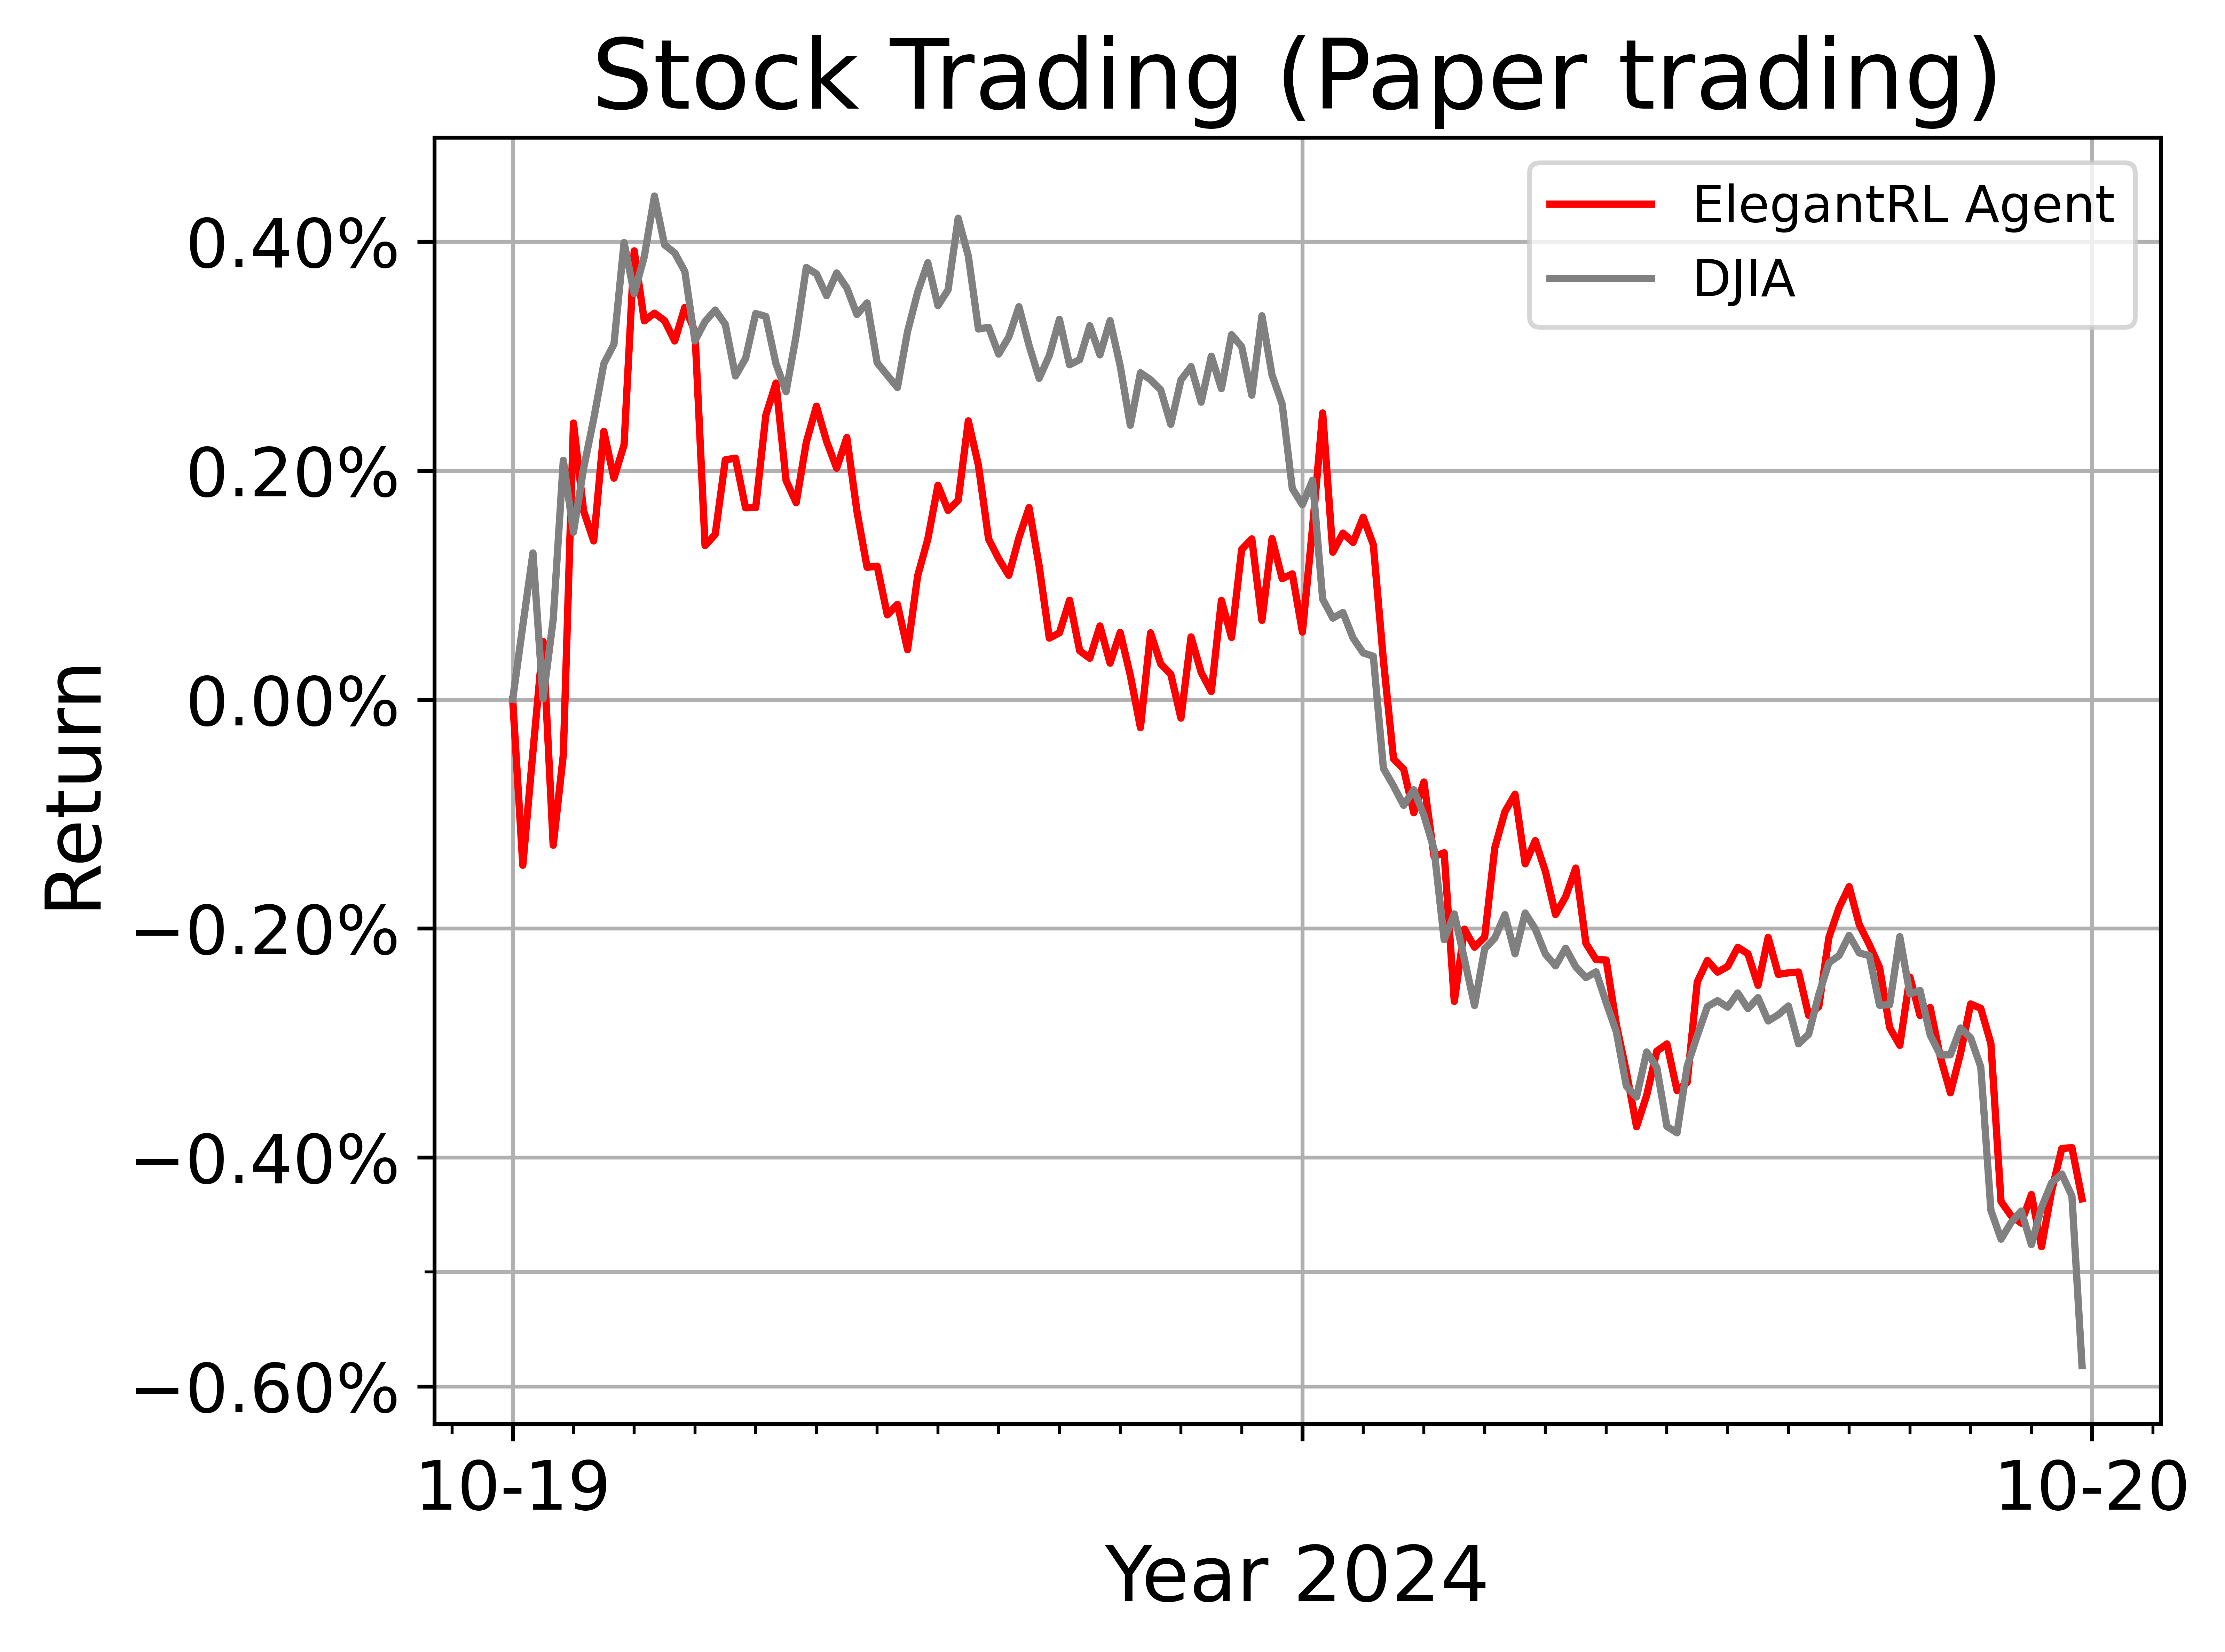

In [114]:
%matplotlib inline
# or plt.ion()

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(dpi=1000)
plt.grid()
plt.grid(which='minor', axis='y')
plt.title('Stock Trading (Paper trading)', fontsize=20)
plt.plot(returns_erl, label = 'ElegantRL Agent', color = 'red')
#plt.plot(returns_sb3, label = 'Stable-Baselines3 Agent', color = 'blue' )
#plt.plot(returns_rllib, label = 'RLlib Agent', color = 'green')
plt.plot(returns_dia, label = 'DJIA', color = 'grey')
plt.ylabel('Return', fontsize=16)
plt.xlabel('Year 2024', fontsize=16)
plt.xticks(size = 14)
plt.yticks(size = 14)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(78))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(6))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.005))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=2))
#ax.xaxis.set_major_locator(ticker.FixedLocator([0, 2, 4, 6, 8, 10, 12, 14])) ## HSG
ax.xaxis.set_major_formatter(ticker.FixedFormatter(['','10-19','','10-20',
                                                    '','10-21','','10-22']))

plt.legend(fontsize=10.5)
#plt.savefig('papertrading_stock.png')
plt.show() # HSG

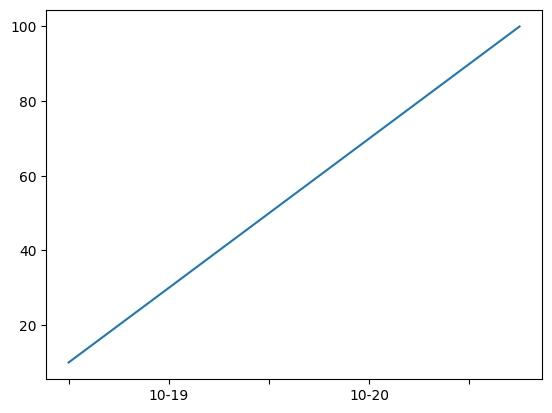

In [118]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create some data
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a plot
fig, ax = plt.subplots()

# Plot the data
ax.plot(data)

# Set the major tick labels
#ax.xaxis.set_major_formatter(ticker.FixedFormatter(['','10-19','','10-20','','10-21','','10-22']))
# Set the locations of the ticks on the x-axis
ax.xaxis.set_major_locator(ticker.FixedLocator([0, 2, 4, 6, 8, 10, 12, 14]))

# Set the labels for the ticks on the x-axis
ax.xaxis.set_major_formatter(ticker.FixedFormatter(['','10-19','','10-20','','10-21','','10-22']))

# Show the plot
plt.show()

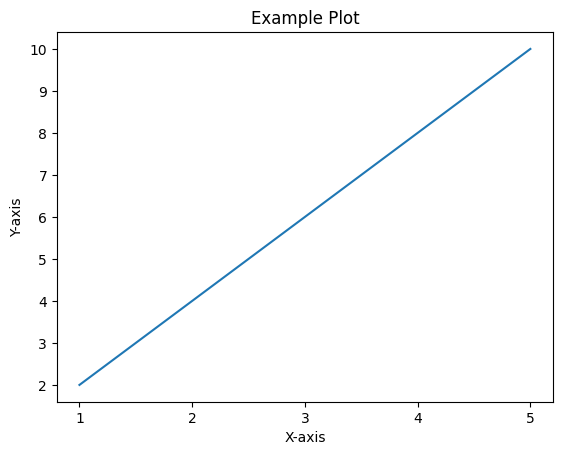

In [117]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create some data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Create a plot
plt.plot(x, y)

# Set the title of the plot
plt.title("Example Plot")

# Set the x-axis label
plt.xlabel("X-axis")

# Set the y-axis label
plt.ylabel("Y-axis")

# Use the MaxNLocator locator to automatically choose a suitable number of ticks
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Display the plot
plt.show()